In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier


# Load data from CSV file
file_path = r'C:\Users\Andre\Downloads\DOUTORADO\consolidadof1balclean.xlsx'
data = pd.read_excel(file_path)
#data = pd.read_excel('c:\andre\consolidado.xlsx', sheet_name='Sheet1')

# Assuming the last column is the target/output column
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Target/Output column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Load data from CSV file
file_path = r'C:\Users\Andre\Downloads\DOUTORADO\consolidadof1.xlsx'
data = pd.read_excel(file_path)

# Assuming the last column is the target/output column
X2 = data.iloc[:, :-1]  # Features (all columns except the last one)
y2 = data.iloc[:, -1]   # Target/Output column

# Split data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

In [3]:
mlp = MLPClassifier(random_state=42)

# Definir a grade de parâmetros para otimização
param_grid = {
    'hidden_layer_sizes': [(10,),(20,), (10,5), (10,10), (20,10), (20,20), (30,20)],
    'activation': ['relu', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.001, 0.0001],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500, 1000]
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=5, scoring='accuracy')

# Executar o ajuste de parâmetros
grid_search.fit(X_train, y_train)

# Exibir os melhores parâmetros e a melhor acurácia obtida
print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor acurácia: {grid_search.best_score_:.2f}")

# Avaliar o modelo com os melhores parâmetros no conjunto de teste
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.2f}")

Melhores parâmetros: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (20, 20), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
Melhor acurácia: 0.89
Acurácia no conjunto de teste: 0.89


c:\conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Users\Andre\AppData\Local\Temp\ipykernel_38596\125633374.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


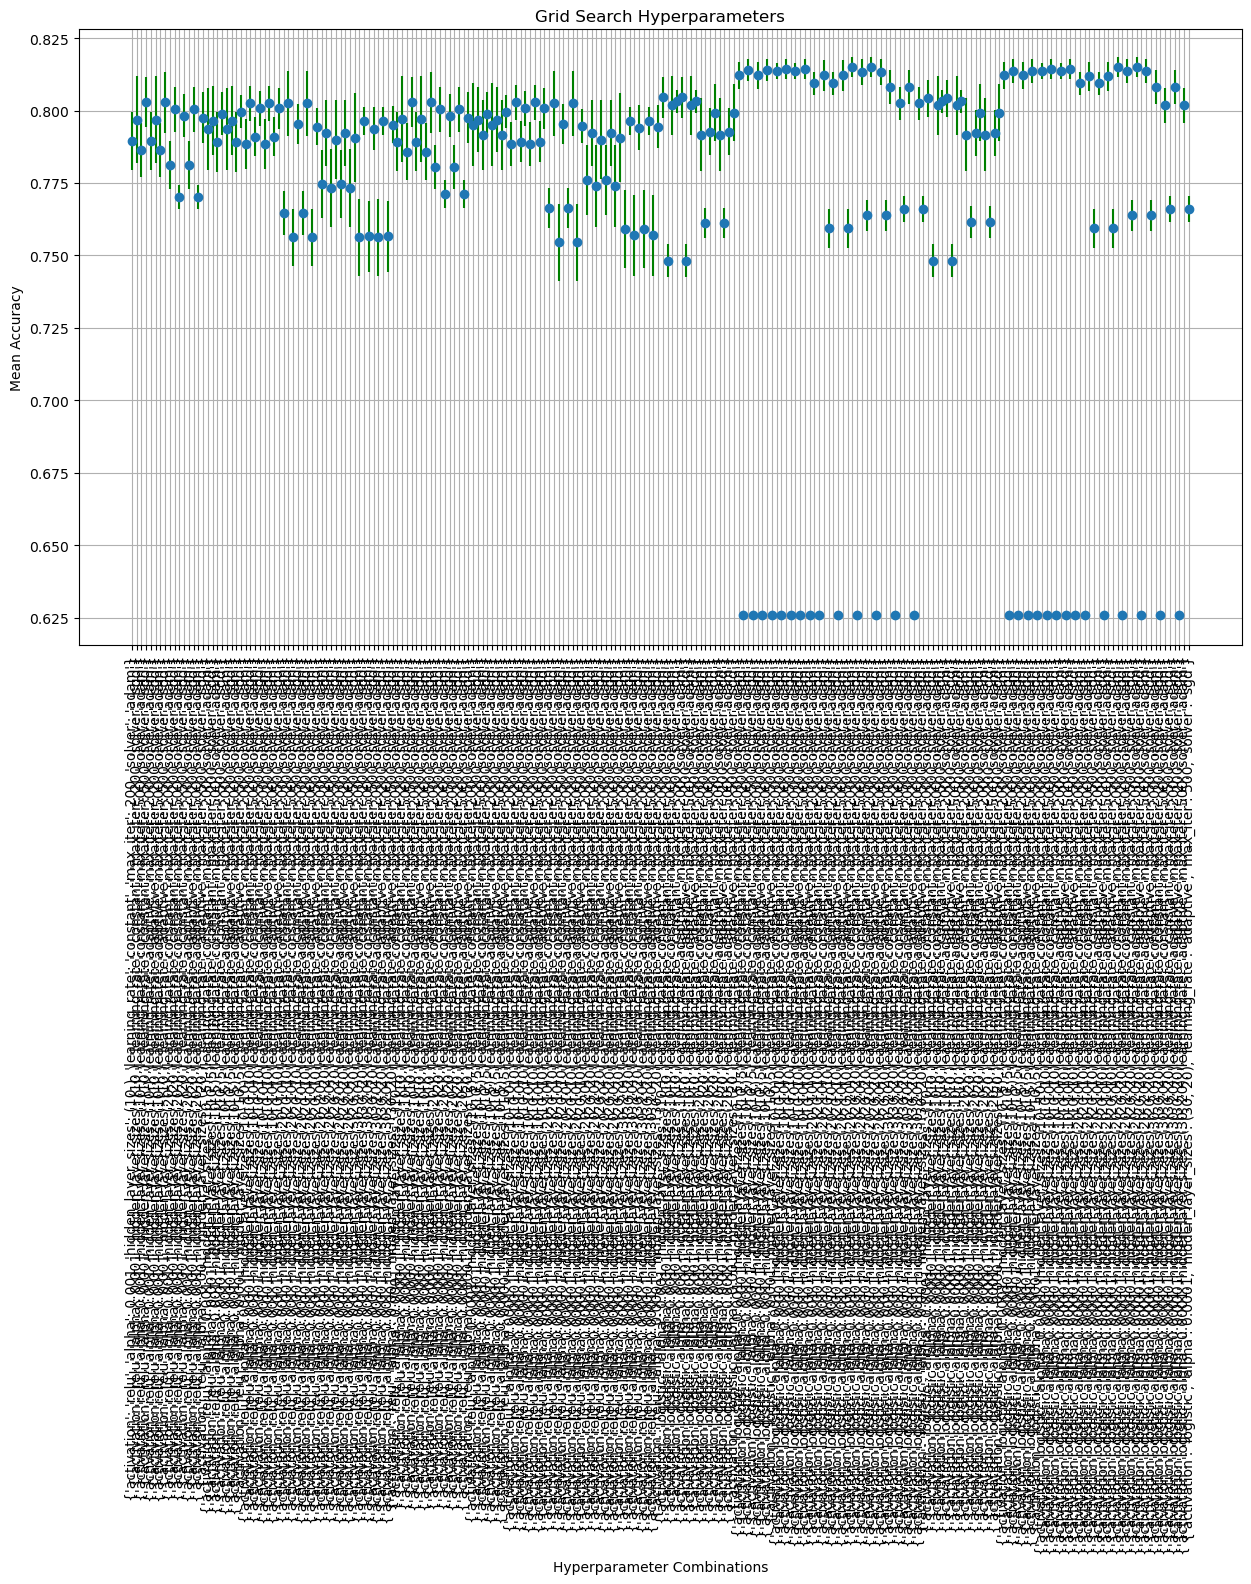

In [3]:
import matplotlib.pyplot as plt

# Extract results
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

# Prepare data for plotting
param_combinations = [str(p) for p in params]

# Plot the results
plt.figure(figsize=(15, 8))
plt.errorbar(param_combinations, means, yerr=stds, fmt='o', ecolor='g', capthick=2)
plt.title('Grid Search Hyperparameters')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Mean Accuracy')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

c:\conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum itera

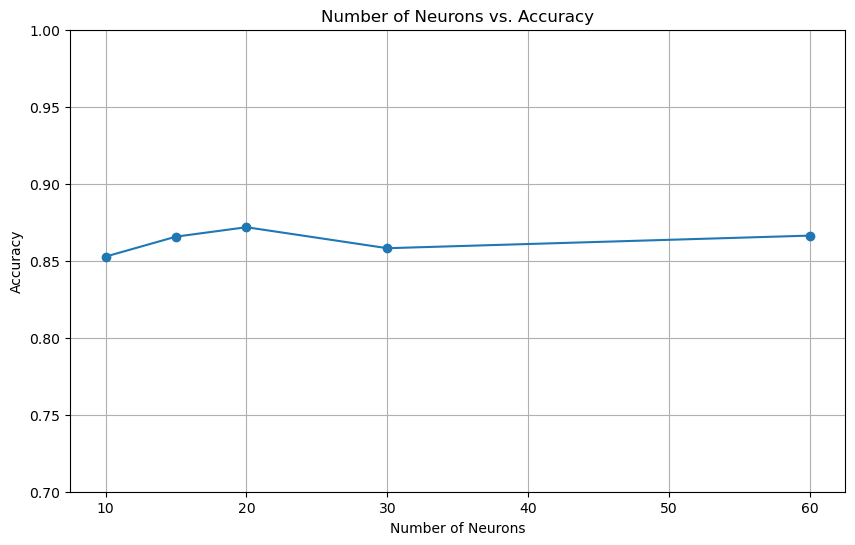

In [4]:
neuron_numbers = [10,15,20,30,60]
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

# Dummy data: replace with your actual data

accuracies = []

for neurons in neuron_numbers:
    mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(neurons,20),
    max_iter=500,
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate='constant',
    random_state=42
)
    cv_scores = cross_val_score(mlp_classifier, X_test, y_test, cv=3, scoring='accuracy')
    accuracies.append(cv_scores.mean())

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(neuron_numbers, accuracies, marker='o')
plt.ylim(0.7, 1)

plt.title('Number of Neurons vs. Accuracy')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


c:\conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix:
[[425  32   6]
 [ 54 346  24]
 [  4  21 421]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       463
           2       0.87      0.82      0.84       424
           5       0.93      0.94      0.94       446

    accuracy                           0.89      1333
   macro avg       0.89      0.89      0.89      1333
weighted avg       0.89      0.89      0.89      1333



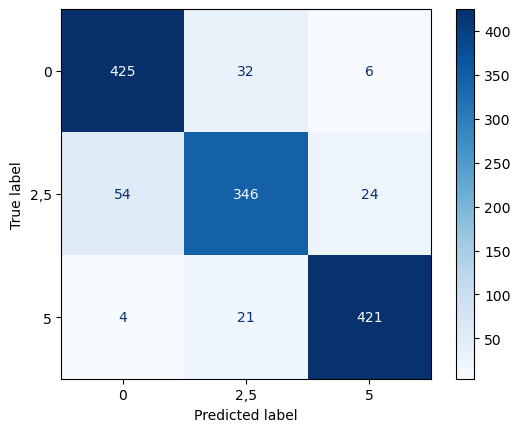

Confusion Matrix:
 [[425  32   6]
 [ 54 346  24]
 [  4  21 421]]


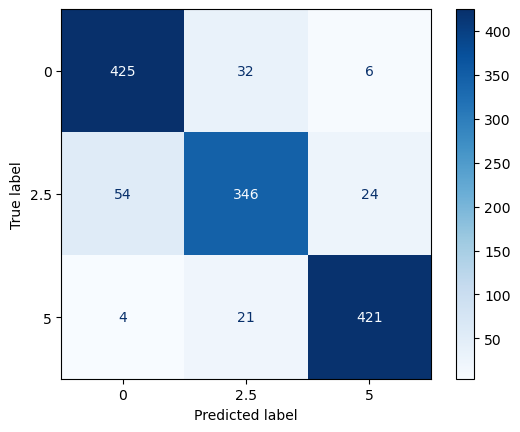


Classe: 0
Precisão: 0.88
Revocação: 0.92
F1-score: 0.90

Classe: 2.5
Precisão: 0.87
Revocação: 0.82
F1-score: 0.84

Classe: 5
Precisão: 0.93
Revocação: 0.94
F1-score: 0.94

Acurácia geral: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       463
           2       0.87      0.82      0.84       424
           5       0.93      0.94      0.94       446

    accuracy                           0.89      1333
   macro avg       0.89      0.89      0.89      1333
weighted avg       0.89      0.89      0.89      1333


--- Classe: 0 ---
Verdadeiros Positivos (TP): 425
Falsos Positivos (FP): 58
Falsos Negativos (FN): 38
Verdadeiros Negativos (TN): 812
Precisão: 425 / (425 + 58) = 0.88
Revocação: 425 / (425 + 38) = 0.92
F1-score: 2 * (0.88 * 0.92) / (0.88 + 0.92) = 0.90

--- Classe: 2.5 ---
Verdadeiros Positivos (TP): 346
Falsos Positivos (FP): 53
Falsos Negativos (FN): 78
Verdadeiros Negativos (TN): 856
Precisão

In [5]:
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay)
import numpy as np
import matplotlib.pyplot as plt

# Define the MLPClassifier
#mlp_classifier = MLPClassifier(hidden_layer_sizes=(12), max_iter=100, activation='relu', solver='adam', random_state=42)
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(30,20),
    max_iter=500,
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate='constant',
    random_state=42)
    
# Train the model
mlp_classifier.fit(X_train, y_train)

# Predict the labels for test set
y_pred = mlp_classifier.predict(X_test)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0", "2,5", "5"])
disp.plot(cmap='Blues')
plt.show()

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Exibe a Matriz de Confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0", "2.5", "5"])
disp.plot(cmap='Blues')
plt.show()

# Calcula métricas manualmente
TP = np.diag(cm)  # Verdadeiros Positivos (diagonal principal)
FP = np.sum(cm, axis=0) - TP  # Falsos Positivos (soma da coluna - TP)
FN = np.sum(cm, axis=1) - TP  # Falsos Negativos (soma da linha - TP)
TN = np.sum(cm) - (TP + FP + FN)  # Verdadeiros Negativos

# Precisão, Recall e F1-score por classe
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Acurácia geral
accuracy = np.sum(TP) / np.sum(cm)

# Exibe os resultados
for i, label in enumerate(["0", "2.5", "5"]):
    print(f"\nClasse: {label}")
    print(f"Precisão: {precision[i]:.2f}")
    print(f"Revocação: {recall[i]:.2f}")
    print(f"F1-score: {f1_score[i]:.2f}")

print(f"\nAcurácia geral: {accuracy:.2f}")

# Exibe o relatório de classificação para conferência
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Cálculo das métricas
TP = np.diag(cm)  # Verdadeiros Positivos (diagonal principal)
FP = np.sum(cm, axis=0) - TP  # Falsos Positivos (soma da coluna - TP)
FN = np.sum(cm, axis=1) - TP  # Falsos Negativos (soma da linha - TP)
TN = np.sum(cm) - (TP + FP + FN)  # Verdadeiros Negativos

# Precisão, Recall e F1-score por classe
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Acurácia geral
accuracy = np.sum(TP) / np.sum(cm)

# Exibir os cálculos detalhados para cada classe
for i, label in enumerate(["0", "2.5", "5"]):
    print(f"\n--- Classe: {label} ---")
    print(f"Verdadeiros Positivos (TP): {TP[i]}")
    print(f"Falsos Positivos (FP): {FP[i]}")
    print(f"Falsos Negativos (FN): {FN[i]}")
    print(f"Verdadeiros Negativos (TN): {TN[i]}")
    
    print(f"Precisão: {TP[i]} / ({TP[i]} + {FP[i]}) = {precision[i]:.2f}")
    print(f"Revocação: {TP[i]} / ({TP[i]} + {FN[i]}) = {recall[i]:.2f}")
    print(f"F1-score: 2 * ({precision[i]:.2f} * {recall[i]:.2f}) / ({precision[i]:.2f} + {recall[i]:.2f}) = {f1_score[i]:.2f}")

print(f"\nAcurácia geral: {accuracy:.2f}")

# Exibe o relatório de classificação para conferência
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Cálculo da acurácia
accuracy = np.sum(TP) / np.sum(cm)
print(f"Acurácia: {accuracy:.2f}")

# Cálculo da média macro
macro_precision = np.mean(precision)
macro_recall = np.mean(recall)
macro_f1 = np.mean(f1_score)

print(f"Macro Precision: {macro_precision:.2f}")
print(f"Macro Recall: {macro_recall:.2f}")
print(f"Macro F1-score: {macro_f1:.2f}")

# Cálculo da média ponderada
total_samples = np.sum(cm)
weighted_precision = np.sum(precision * np.sum(cm, axis=1)) / total_samples
weighted_recall = np.sum(recall * np.sum(cm, axis=1)) / total_samples
weighted_f1 = np.sum(f1_score * np.sum(cm, axis=1)) / total_samples

print(f"Weighted Precision: {weighted_precision:.2f}")
print(f"Weighted Recall: {weighted_recall:.2f}")
print(f"Weighted F1-score: {weighted_f1:.2f}")


# Calcula a acurácia manualmente
accuracy = np.trace(cm) / np.sum(cm)
print(f"\nAccuracy: {accuracy:.2f}")

# Extraindo métricas individuais
TP = np.diag(cm)  # Verdadeiros Positivos (diagonal principal)
FP = np.sum(cm, axis=0) - TP  # Falsos Positivos (coluna - TP)
FN = np.sum(cm, axis=1) - TP  # Falsos Negativos (linha - TP)

# Precisão, Recall e F1-score por classe
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Exibir métricas por classe
for i, label in enumerate(np.unique(y_test)):
    print(f"\nClass {label}:")
    print(f"  Precision: {precision[i]:.2f}")
    print(f"  Recall: {recall[i]:.2f}")
    print(f"  F1-score: {f1_score[i]:.2f}")

# Cálculo da Média Macro
macro_precision = np.mean(precision)
macro_recall = np.mean(recall)
macro_f1 = np.mean(f1_score)

print("\nMacro Average:")
print(f"  Precision: {macro_precision:.2f}")
print(f"  Recall: {macro_recall:.2f}")
print(f"  F1-score: {macro_f1:.2f}")

# Cálculo da Média Ponderada
total_samples = np.sum(cm)
weighted_precision = np.sum(precision * np.sum(cm, axis=1)) / total_samples
weighted_recall = np.sum(recall * np.sum(cm, axis=1)) / total_samples
weighted_f1 = np.sum(f1_score * np.sum(cm, axis=1)) / total_samples

print("\nWeighted Average:")
print(f"  Precision: {weighted_precision:.2f}")
print(f"  Recall: {weighted_recall:.2f}")
print(f"  F1-score: {weighted_f1:.2f}")

# Relatório completo do Sklearn
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



# Cálculo da Acurácia
total_samples = np.sum(cm)
correct_predictions = np.trace(cm)  # Soma dos verdadeiros positivos (diagonal principal)
accuracy = correct_predictions / total_samples

print("\nCálculo da Acurácia:")
print(f"Total de amostras: {total_samples}")
print(f"Total de previsões corretas (TP): {correct_predictions}")
print(f"Acurácia = TP / Total = {correct_predictions} / {total_samples} = {accuracy:.2f}")

# Extraindo métricas individuais
TP = np.diag(cm)  # Verdadeiros Positivos (diagonal principal)
FP = np.sum(cm, axis=0) - TP  # Falsos Positivos (soma da coluna - TP)
FN = np.sum(cm, axis=1) - TP  # Falsos Negativos (soma da linha - TP)

# Cálculo de Precisão, Recall e F1-score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Exibir cálculos detalhados por classe
for i, label in enumerate(np.unique(y_test)):
    print(f"\nClasse {label}:")
    print(f"  TP (Verdadeiros Positivos): {TP[i]}")
    print(f"  FP (Falsos Positivos): {FP[i]}")
    print(f"  FN (Falsos Negativos): {FN[i]}")
    
    print(f"  Precisão = TP / (TP + FP) = {TP[i]} / ({TP[i]} + {FP[i]}) = {precision[i]:.2f}")
    print(f"  Recall = TP / (TP + FN) = {TP[i]} / ({TP[i]} + {FN[i]}) = {recall[i]:.2f}")
    print(f"  F1-score = 2 * (Precisão * Recall) / (Precisão + Recall) = {f1_score[i]:.2f}")

# Cálculo da Média Macro
macro_precision = np.mean(precision)
macro_recall = np.mean(recall)
macro_f1 = np.mean(f1_score)

print("\nMédia Macro:")
print(f"  Precisão Média = {macro_precision:.2f}")
print(f"  Recall Médio = {macro_recall:.2f}")
print(f"  F1-score Médio = {macro_f1:.2f}")

# Cálculo da Média Ponderada
weighted_precision = np.sum(precision * np.sum(cm, axis=1)) / total_samples
weighted_recall = np.sum(recall * np.sum(cm, axis=1)) / total_samples
weighted_f1 = np.sum(f1_score * np.sum(cm, axis=1)) / total_samples

print("\nMédia Ponderada:")
print(f"  Precisão Ponderada = {weighted_precision:.2f}")
print(f"  Recall Ponderado = {weighted_recall:.2f}")
print(f"  F1-score Ponderado = {weighted_f1:.2f}")

# Relatório completo do Sklearn para conferência
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




In [12]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Fazendo previsões
y_pred = knn.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

# Relatório detalhado
print("Relatório de classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.85
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       501
           2       0.80      0.79      0.80       477
           5       0.89      0.94      0.91       488

    accuracy                           0.85      1466
   macro avg       0.85      0.85      0.85      1466
weighted avg       0.85      0.85      0.85      1466

